<a href="https://colab.research.google.com/github/saakethk/machine-learning-research/blob/main/ModelExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/emotions-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'emotions-dataset' dataset.
Path to dataset files: /kaggle/input/emotions-dataset


In [ ]:
DATASET_LOCATION = "/root/.cache/kagglehub/datasets/bhavikjikadara/emotions-dataset/versions/1/emotions.csv"

In [ ]:
import sqlite3
import pandas as pd

def convert_sqlite3(path: str):
  data = pd.read_csv(path)
  conn = sqlite3.connect('data.db')
  data.to_sql('emotions', conn, if_exists='replace', index=False)
  conn.commit()
  conn.close()

convert_sqlite3(DATASET_LOCATION)

In [ ]:
import pandas as pd

conn = sqlite3.connect('data.db')
df = pd.read_sql_query("SELECT * FROM emotions", conn)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Implementing TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit model
corpus_strings = [element[0] for element in df.values.tolist()] # Gets all strings
vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(corpus_strings)

In [ ]:
def visualize_tfid_embedding(document: str):
  embedding = vectorizer.transform([document])
  print(document)
  print(embedding)

# print(result.toarray())
visualize_tfid_embedding(corpus_strings[10])

i try to be nice though so if you get a bitchy person on the phone or at the window feel free to have a little fit and throw your pen at her face
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28 stored elements and shape (1, 75276)>
  Coords	Values
  (0, 2384)	0.06414376767794312
  (0, 3977)	0.24796386457262837
  (0, 5508)	0.11540677769881377
  (0, 6695)	0.23579800921889435
  (0, 22632)	0.2132677681788961
  (0, 23283)	0.049884353703636586
  (0, 23948)	0.25926970803221455
  (0, 25076)	0.21551088434813795
  (0, 26461)	0.14497888611123103
  (0, 29081)	0.10638919733806632
  (0, 29626)	0.15893166921436558
  (0, 31483)	0.14196064127453722
  (0, 38344)	0.14523143916074574
  (0, 44894)	0.23138810620342407
  (0, 46428)	0.1202549177011273
  (0, 46742)	0.1292932024286098
  (0, 48709)	0.31745542839638524
  (0, 49082)	0.1869017165336727
  (0, 49392)	0.25400842189444955
  (0, 61217)	0.10427776473721669
  (0, 66261)	0.14274907093362998
  (0, 66672)	0.178140022263781
  (0, 66785)	0.267

In [ ]:
# Implementing basic support vector machine classification model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

x, y = df.drop("label", axis=1), df["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)
print(y_train)

                                                     text
373961                          i can actually feel happy
256061  i sit down to write a blog post and my mind fe...
356730  i have to say i am feeling strong and strong i...
247815  im alternating between feeling outraged and ap...
166116                 i started to feel really fucked up
...                                                   ...
259178                         i feel love i fell beloved
365838  i realized that often times that isnt the reac...
131932                          i feel so envious of that
146867  im still impatient frequently irritable and at...
121958                     i feel weird in this apartment

[291766 rows x 1 columns]
373961    1
256061    0
356730    1
247815    3
166116    3
         ..
259178    2
365838    1
131932    3
146867    1
121958    4
Name: label, Length: 291766, dtype: int64


In [ ]:
# Need to generate embedding for just training set
vectorizer = TfidfVectorizer().fit(x_train["text"])
x_train_tf_idf = vectorizer.transform(x_train["text"])
print(x_train_tf_idf)
print(x_train_tf_idf.shape)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4559009 stored elements and shape (291766, 63768)>
  Coords	Values
  (0, 554)	0.6270107278017127
  (0, 7967)	0.45057962792707956
  (0, 19803)	0.1663444312590849
  (0, 24460)	0.613322978786669
  (1, 2016)	0.07724864093543267
  (1, 3039)	0.3019399402452799
  (1, 3331)	0.1493182429012958
  (1, 5743)	0.28464143318229523
  (1, 5913)	0.24587790245818078
  (1, 15984)	0.21776009366171326
  (1, 19849)	0.20699291392437033
  (1, 35496)	0.25239789053788964
  (1, 37049)	0.10680926487137775
  (1, 42918)	0.24894637780090595
  (1, 49098)	0.35980389843915733
  (1, 51004)	0.2761468773565988
  (1, 53169)	0.3633064352655091
  (1, 56156)	0.08593593286431353
  (1, 56992)	0.08155915602391313
  (1, 61970)	0.31497124924139336
  (1, 62843)	0.24655279030757926
  (2, 1728)	0.12416894301037837
  (2, 2016)	0.07159961863515803
  (2, 2769)	0.15705339347887856
  (2, 8480)	0.4362839341515523
  :	:
  (291764, 26510)	0.3545479795418859
  (291764, 26894)	0.0898

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Creates model
clf = MultinomialNB().fit(x_train_tf_idf, y_train)

In [ ]:
# Testing the model
test_docs = corpus_strings[:5]
test_docs_vectorized = vectorizer.transform(test_docs)

# Mapping of outputs to their interpretable value
output_map = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

predicted = clf.predict(test_docs_vectorized)
for doc, category in zip(test_docs, predicted):
  print(f"{doc} => {output_map[category]}")

i just feel really helpless and heavy hearted => sadness
ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing => sadness
i gave up my internship with the dmrg and am feeling distraught => fear
i dont know i feel so lost => sadness
i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative => joy


In [ ]:
# Evaluating the model
from sklearn import metrics

predicted = clf.predict(vectorizer.transform(x_test["text"]))
print(metrics.classification_report(y_test, predicted, target_names=output_map.values()))

              precision    recall  f1-score   support

     sadness       0.73      0.94      0.82     36261
         joy       0.68      0.98      0.80     42255
        love       0.96      0.15      0.26     10241
       anger       0.94      0.53      0.68     17295
        fear       0.92      0.38      0.53     14394
    surprise       0.98      0.04      0.07      4597

    accuracy                           0.73    125043
   macro avg       0.87      0.50      0.53    125043
weighted avg       0.79      0.73      0.69    125043



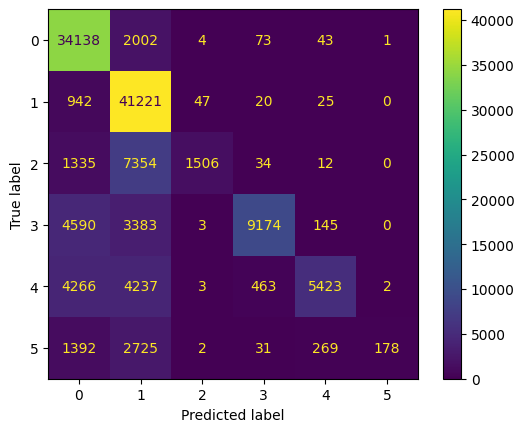

In [ ]:
# Visualizing and plotting AUC (Area Under Curve) and ROC
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    vectorizer.transform(x_test["text"]),
    y_test
)


In [ ]:
from sklearn.pipeline import Pipeline
# Building pipeline in SkLearn
classifier = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
classifier.fit(x_train["text"], y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])